In [42]:
import sys
sys.path.append('../')

In [43]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import X_and_P_ops, RY_ansatz, VarFourier

In [44]:
num_qubits = 4

In [45]:
def init_state():
    pass 

In [46]:
num_layers = 4
var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit

num_params = var_state_class.num_params
num_params

16

(<Figure size 1900x500 with 1 Axes>, <Axes: >)

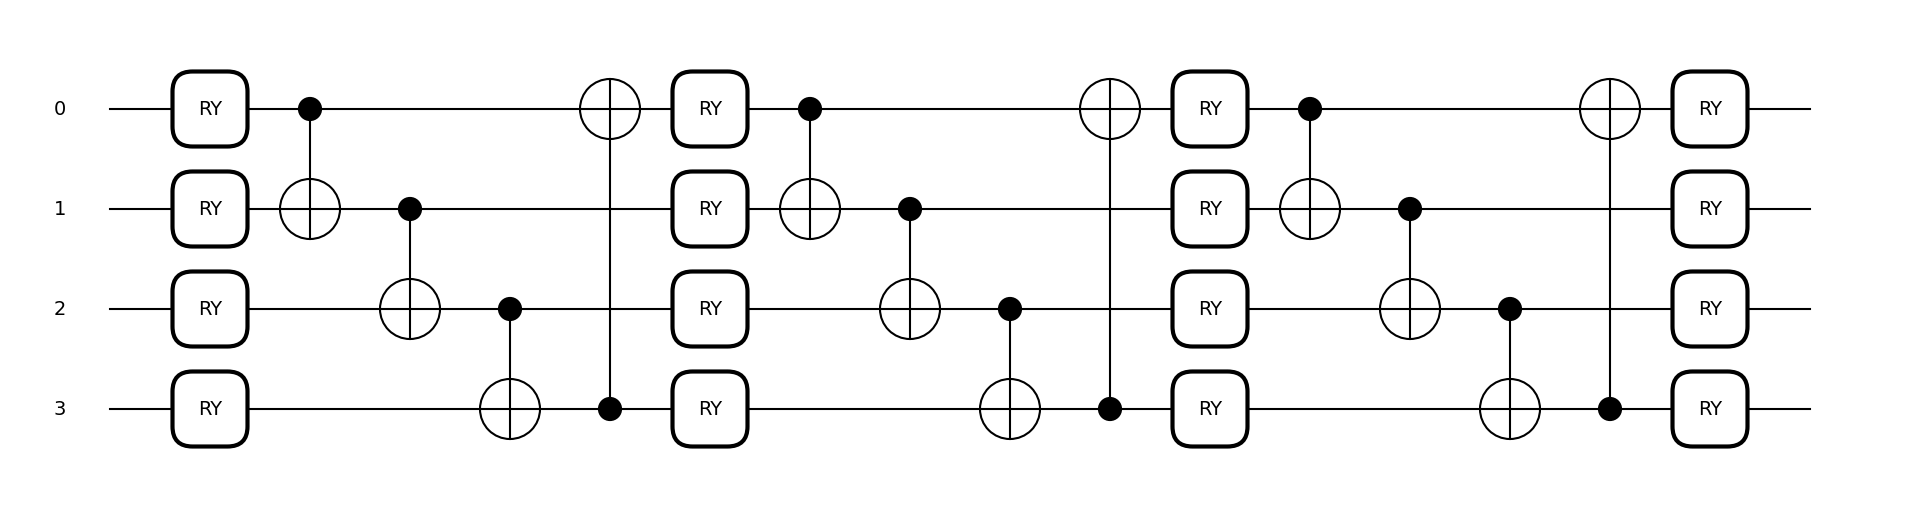

In [47]:
qml.draw_mpl( var_state )( num_params*[0] )

In [48]:
X, P = X_and_P_ops( range(num_qubits), x_min=-5, x_max=5 )
Hamil = [  
        qml.s_prod(0.5,X.pow(2)),
        qml.s_prod(0.5,P.pow(2))
        ]

In [49]:
X_matrix = X.matrix()
P_matrix = P.matrix()
Hamil_matrix = 0.5*np.linalg.matrix_power( X_matrix, 2 ) + 0.5*np.linalg.matrix_power( P_matrix, 2 )
vals, vecs = np.linalg.eigh( Hamil_matrix )
val = vals[0]
vec = vecs[:,0]
val 

0.5000000011276833

In [50]:
device = qml.device( "default.qubit", 
                    wires=num_qubits)

varqft = VarFourier( Hamil,
                    device,
                    var_state  = var_state,
                    init_state = init_state
                    )

In [51]:
params_init = np.random.randn( num_params )*0.01

params_ground, energies_ground = varqft.run( params_init, max_iterations=500, learning_rate=0.1 )

Step:    125, Energy:     0.500782


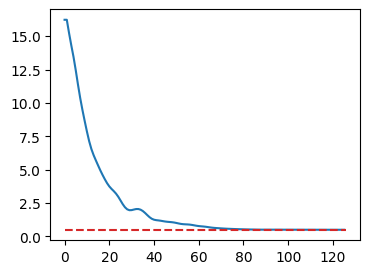

In [52]:
plt.figure( figsize=(4,3) ) 
plt.plot( energies_ground )
plt.hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

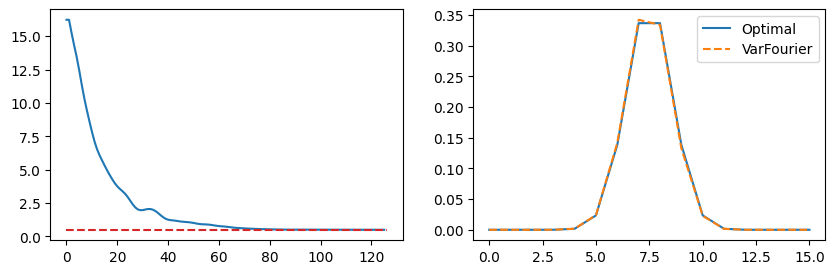

In [53]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 